In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit,StratifiedKFold,cross_val_score,train_test_split,RepeatedStratifiedKFold,KFold
from sklearn.linear_model import LinearRegression
from numpy import mean,absolute
from sklearn.metrics import mean_absolute_error,confusion_matrix,auc
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from builtins import zip
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc,roc_auc_score,f1_score,average_precision_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

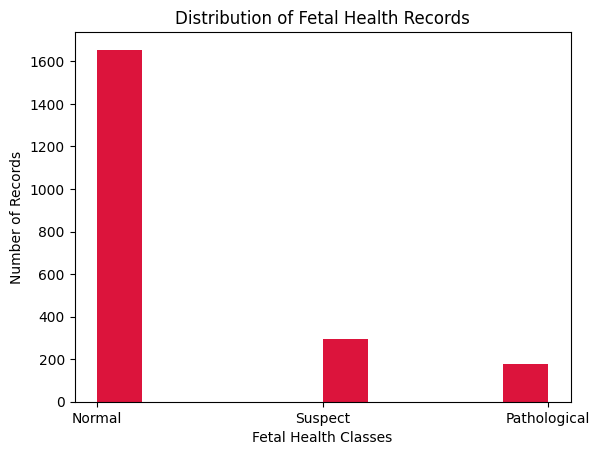

In [444]:
df = pd.read_csv('fetal_health.csv')
fetal_health = df['fetal_health']
plt.hist(fetal_health,color='crimson')

plt.xticks([1,2,3],['Normal','Suspect','Pathological'])

plt.xlabel('Fetal Health Classes')
plt.ylabel('Number of Records')
plt.title("Distribution of Fetal Health Records")
plt.show()

**LINEAR REGRESSION MODEL**

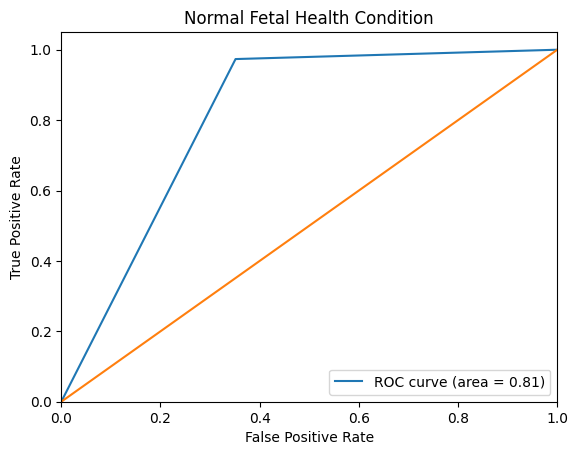

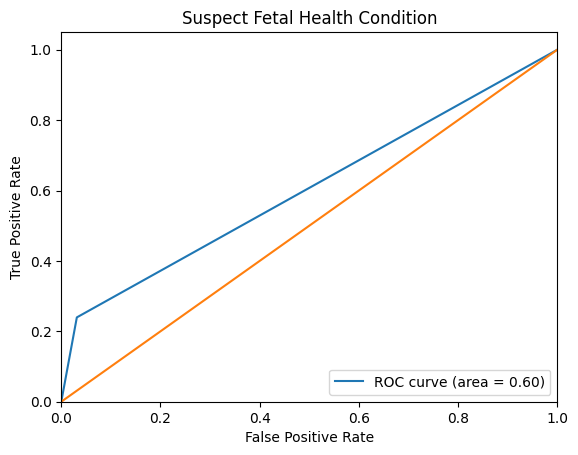

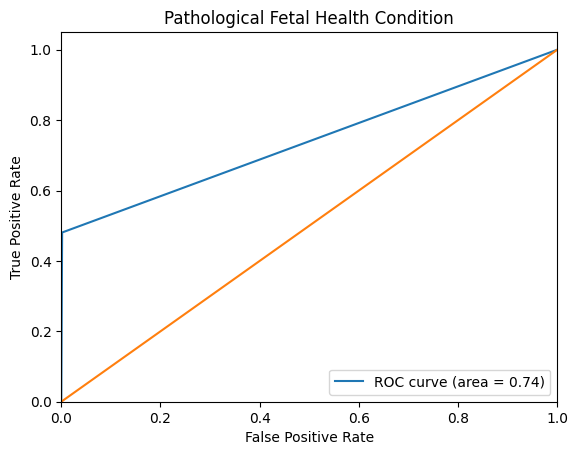

Mean Absolute Error: 0.277
Range of Data:  54.0
Variance:  96.84221570472027


In [445]:
X = df.iloc[:,:-1]
Y = fetal_health

X_train,X_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.3,random_state=1)

model=LinearRegression()
y_pred = model.fit(X_train, y_train).predict(X_test)

y = label_binarize(Y, classes=[1,2,3])
n_classes = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = OneVsRestClassifier(model)
y_score = clf.fit(X_train, y_train).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if i == 0:
        plt.title("Normal Fetal Health Condition")
    if i == 1:
        plt.title("Suspect Fetal Health Condition")
    if i == 2:
        plt.title("Pathological Fetal Health Condition")
    plt.legend(loc="lower right")
    plt.show()

cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
error = mean(absolute(scores))

print(f'Mean Absolute Error: {error:.3f}')
print("Range of Data: ", (df.max() - df.min()).iloc[0])
print("Variance: ", df.var().iloc[0])


To address the data imbalance in this dataset, we took the approach of K-fold cross validation. this can help to reduce overfitting and bias in a machine learning model by training the model on different subsets of the data and evaluating its performance on different subsets of the data. This can give a more accurate assessment of the model's performance, because it takes into account the entire dataset, rather than just a single train-test split.

Specifically, we used the StratifiedKFold class from the sklearn.model_selection module. This class can be used to split a dataset into folds while maintaining the same class balance in each fold. This can help ensure that each fold is representative of the overall dataset, which can improve the accuracy and reliability of your model.

The values in the dataset have a large range and high variance, so it may be more difficult for a model to make accurate predictions and a lower MAE showcases that the model is quite accurate. We got a low MAE of 0.277 which shows that our stratified k fold cross validation approach was succesful.

**DECISION TREE MODEL**

In [446]:
model = DecisionTreeClassifier()

rfe = RFE(model,n_features_to_select=10)
fit = rfe.fit(X,Y)

selected_features = X.columns[fit.support_]
sorted_ranking = sorted(fit.ranking_, reverse=False)
ranked_features = list(zip(sorted_ranking, selected_features))

print("Feature : Rank\n")
for ranking, feature in ranked_features[:10]:
  print(f"{feature}: {ranking}")

cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model, X, Y, scoring='accuracy',cv=cv,n_jobs=-1)
accuracy = mean(scores)
print("\nAccuracy: ",accuracy)


Feature : Rank

baseline value: 1
uterine_contractions: 1
abnormal_short_term_variability: 1
mean_value_of_short_term_variability: 1
percentage_of_time_with_abnormal_long_term_variability: 1
mean_value_of_long_term_variability: 1
histogram_min: 1
histogram_max: 1
histogram_mode: 1
histogram_mean: 1

Accuracy:  0.9214434405173175


**These are 10 Features that are most reflective to fealth health conditions.**

Recursive feature elimination (RFE) is a feature selection method that uses a model (such as a logistic regression model) to determine the importance of each feature, and then eliminates the least important features until a specified number of features is left. The resulting list of features is ranked by their importance, with the most important feature having a ranking of 1

A lower ranking means that a feature is more important for the model, and is therefore more reflective for fetal health conditions.
These features are strongly correlated with fetal health. In other words, the values of these features are good indicators of the health of the fetus.

To explain this correlation, you could look at the individual features and their values, and consider how they might affect fetal health. For example, if one of the most reflective features is the mother's age, you could explain that older mothers are more likely to have health problems that can affect the fetus, such as high blood pressure or diabetes.

The correlation is statistically significant at 90% but not 95%.

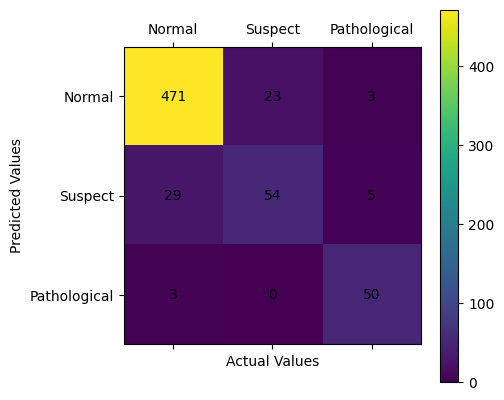

In [447]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.3,random_state=1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test,y_pred,average='macro')

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.matshow(cm)
plt.colorbar()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.xticks([0,1,2],['Normal','Suspect','Pathological'])
plt.yticks([0,1,2],['Normal','Suspect','Pathological'])

for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, cm[i][j], ha='center', va='center')

plt.show()

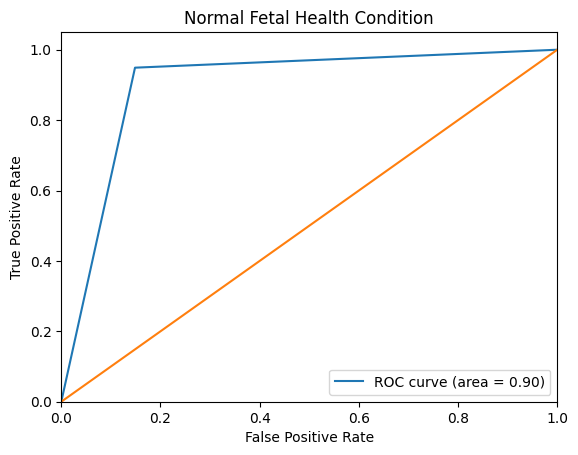

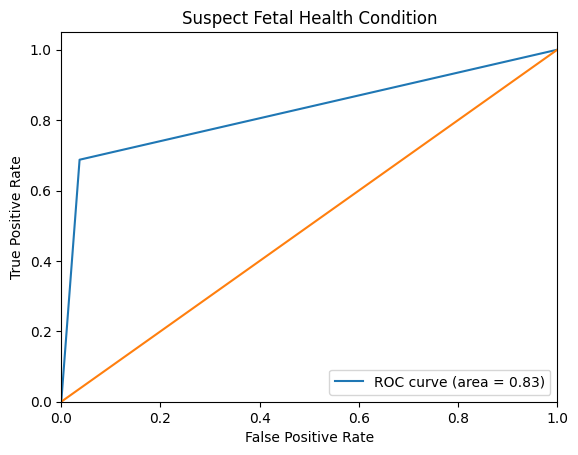

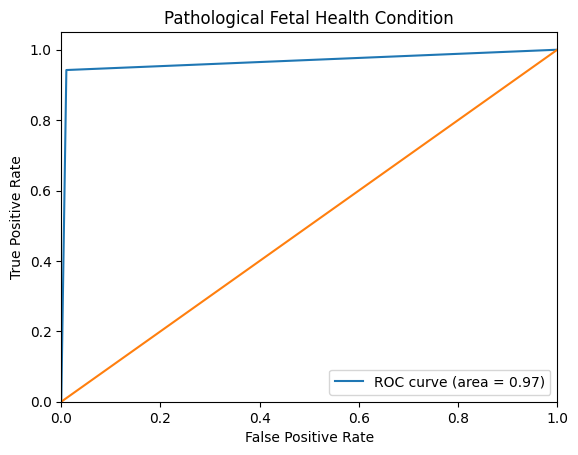

F1 Score: 0.832


In [448]:
y = label_binarize(Y, classes=[1,2,3])
n_classes = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = OneVsRestClassifier(model)
y_score = clf.fit(X_train, y_train).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if i == 0:
        plt.title("Normal Fetal Health Condition")
    if i == 1:
        plt.title("Suspect Fetal Health Condition")
    if i == 2:
        plt.title("Pathological Fetal Health Condition")
    plt.legend(loc="lower right")
    plt.show()

print(f"F1 Score: {f1:0.3f}")


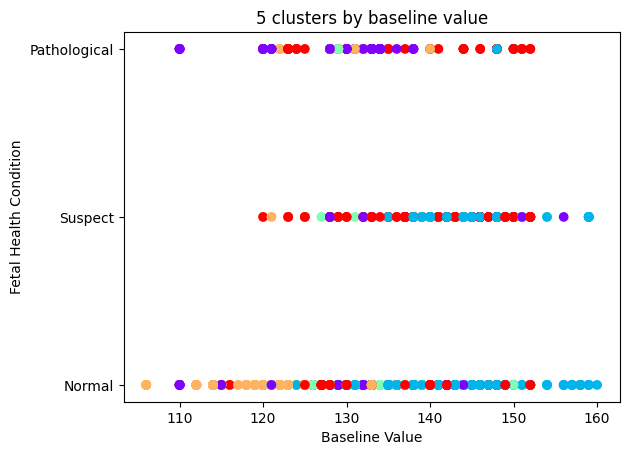

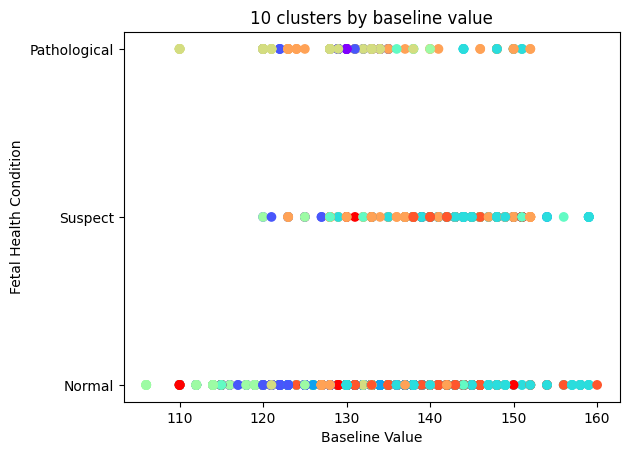

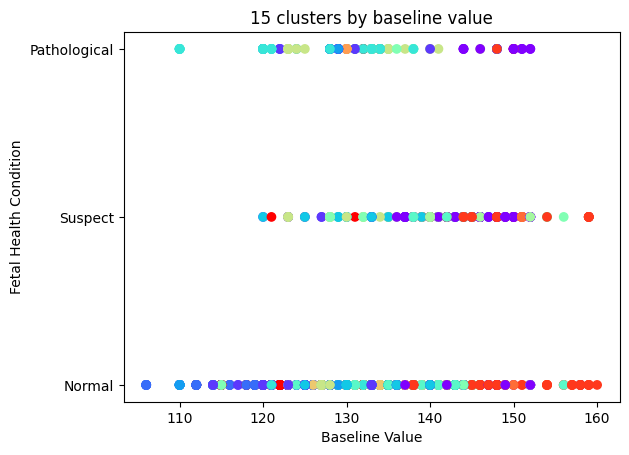

In [464]:
from sklearn.cluster import KMeans

for k in [5,10,15]:

    model = KMeans(n_clusters=k)
    model.fit(X)
    clusters = model.predict(X)
    plt.scatter(df.iloc[:,0],fetal_health,c=clusters,cmap="rainbow")
    plt.title(f"{k} clusters by baseline value")
    plt.yticks([1,2,3],['Normal','Suspect','Pathological'])
    plt.xlabel("Baseline Value")
    plt.ylabel("Fetal Health Condition")
    plt.show()